<a href="https://colab.research.google.com/github/PiKaChu-wcg/data_analysis/blob/main/BAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! cp /content/drive/MyDrive/BAA/*.csv /content/
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
import os,gc,re,warnings,sys
warnings.filterwarnings("ignore")

In [33]:
train_df=pd.read_csv("training.csv",encoding='gbk',index_col=0)
test_df=pd.read_csv("testing.csv",encoding='gbk',index_col=0)

## 查看缺失值

In [ ]:
def check_null(df):
    res=pd.DataFrame(df.isnull().sum())
    res.columns=['total']
    res['precent']=res['total']/df.shape[0]
    return res
check_null(train_df)

,total,precent
编号,0,0.0
信用卡账户状态,0,0.0
信用卡到期期限,0,0.0
信用卡历史信息,0,0.0
贷款目的,0,0.0
活期账户余额,0,0.0
非活期账户余额,0,0.0
受雇佣状况,0,0.0
分期付款比例,0,0.0
婚姻与性别,0,0.0


# 统计绘图

In [ ]:
def plot_envs(df, cols=None):
    if(not cols):
        cols=df.columns
    if not os.path.exists('plot_envs'):
        os.mkdir("plot_envs")
    for col in cols:
        plt.figure()
        v = df[col].value_counts().reset_index()
        fig = sns.barplot(x=v['index'], y=v[col])
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(col)
        img=fig.get_figure()
        img.savefig('plot_envs/'+col+'.png')

plot_envs(train_df)

# 特征相关性

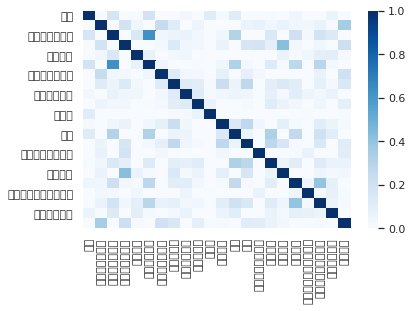

In [ ]:
sns.heatmap(train_df.corr(),vmax=1,vmin=0,cmap='Blues')

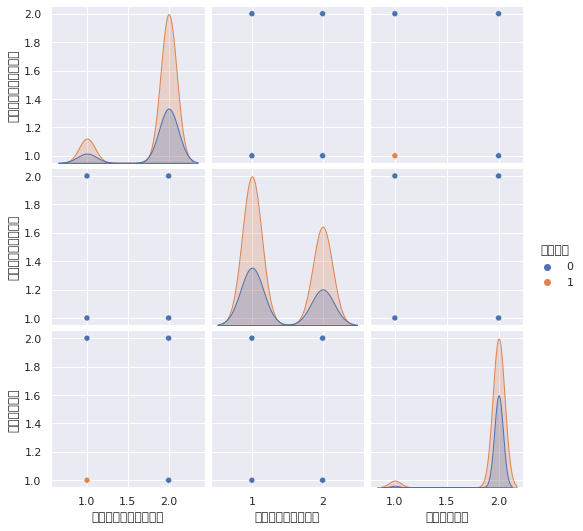

In [ ]:
sns.pairplot(train_df.iloc[:,-4:],hue='信用分类')

# 数据建模

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import roc_auc_score,accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=TTS(train_df.iloc[:,:-1],train_df.iloc[:,-1:],test_size=0.33)

In [ ]:
dtc=DTC(criterion='gini')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
auc=roc_auc_score(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)

In [ ]:
print("auc:{},acc:{}".format(auc,acc))

auc:0.9062150055991041,acc:0.9166666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
rfc=RFC()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
auc=roc_auc_score(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)

In [ ]:
print("auc:{},acc:{}".format(auc,acc))

auc:0.967005076142132,acc:0.9507575757575758


In [ ]:
t=pd.DataFrame([rfc.feature_importances_],columns=x_train.columns)

<BarContainer object of 21 artists>

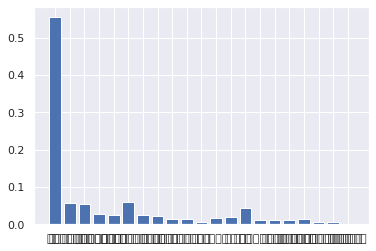

In [ ]:
plt.bar(t.columns,t.values.tolist()[0])

In [6]:
from xgboost.sklearn import XGBClassifier as xgb

In [7]:
model = xgb()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
auc=roc_auc_score(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)
print("auc:{},acc:{}".format(auc,acc))

# 调参

In [37]:
from sklearn.model_selection import GridSearchCV,cross_val_score as cvs
from sklearn.utils import shuffle
def trypara(model,df,para,conti=True):
    
    df = shuffle(df)
    
    GS=GridSearchCV(model,para,cv=5)
    GS.fit(df.iloc[:,:-1],df.iloc[:,-1:])
    if conti:
        plt.plot(para[list(para.keys())[0]],GS.cv_results_['mean_test_score'])
        plt.title(list(para.keys())[0]) 
    else:
        plt.bar(para[list(para.keys())[0]],GS.cv_results_['mean_test_score'])
        plt.title(list(para.keys())[0]) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


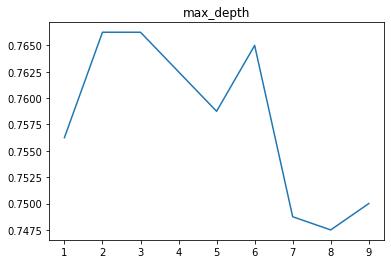

In [38]:
para={'max_depth':np.arange(1,10,1)}
model=xgb()
trypara(model,train_df,para,True)

In [26]:
list(para.keys())[0]

'max_depth'

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   信用卡账户状态     800 non-null    int64
 1   信用卡到期期限     800 non-null    int64
 2   信用卡历史信息     800 non-null    int64
 3   贷款目的        800 non-null    int64
 4   活期账户余额      800 non-null    int64
 5   非活期账户余额     800 non-null    int64
 6   受雇佣状况       800 non-null    int64
 7   分期付款比例      800 non-null    int64
 8   婚姻与性别       800 non-null    int64
 9   担保人         800 non-null    int64
 10  居住时间        800 non-null    int64
 11  财产          800 non-null    int64
 12  年龄          800 non-null    int64
 13  其他分期付款计划    800 non-null    int64
 14  住房情况        800 non-null    int64
 15  信用卡数        800 non-null    int64
 16  工作状态        800 non-null    int64
 17  无工作的家庭成员人数  800 non-null    int64
 18  注册电话是否在使用   800 non-null    int64
 19  是否为外国人      800 non-null    int64
 20  信用分类        800 non-null    int6